In [1]:
import tweepy
import time
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
access_token = '2811837881-GivkP3K629JzIdMf8w32fv8JxSR1McGI08nmDAm'
access_token_secret = 'TyPlQzIg41mqV0TZAkkjya98zTfi167B9isMqJiaaPw5S'
consumer_key = 'pKzdxzzwocUjPlJyOVRE3aXrq'
consumer_secret = 'U4K2fVO5ArAo5klns1Y0E9t7WwvzXYZfsWzP9E17iw8TIVnLyH'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

In [3]:
cols = ['id', 'conversation_id', 'date', 'time', 'user_id', 'username', 'tweet', 'replies_count', 'retweets_count', 'likes_count']
wlm = pd.read_csv('../data/raw/wlm_3.csv', usecols=cols)
wlm = wlm[wlm.date.isin(['2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06'])]
wlm['date'] = pd.to_datetime(wlm['date']).dt.date.astype(str)


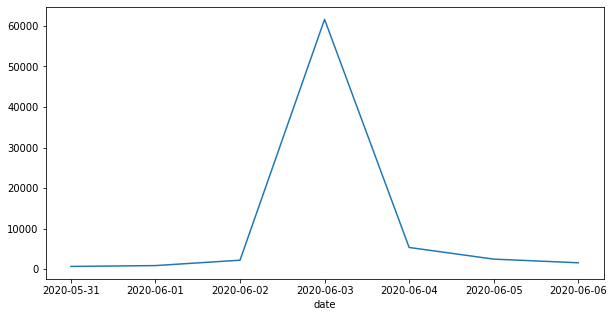

In [4]:
wlm.groupby('date').size().plot(figsize=(10, 5));

In [5]:
subset = pd.read_csv('../data/raw/subset.csv')
subset.head()

,id,conversation_id,date,time,user_id,username,tweet,replies_count,retweets_count,likes_count
0,1268186183290564608,1268186183290564608,2020-06-03,07:22:02,831439388215230464,samuel_kalubi,"To enjoy peace, like king Asa. Live to please ...",0,0,2
1,1268228297747546112,1268228297747546112,2020-06-03,10:09:23,1243279102284648457,meel71615030,Eu vendo a vergonha que é essa TAG #WhiteLives...,0,0,1
2,1268176202491199489,1268176202491199489,2020-06-03,06:42:22,871884233194840064,mincrosoft_,#WhiteLivesMatter eat shit racists 🥰 https://...,0,0,1
3,1268179324500230147,1268179324500230147,2020-06-03,06:54:47,914113530827173888,wonderfulmeteor,WHY YES WHITE’S IG LIVES DO MATTER #WhiteLives...,0,0,0
4,1268190340365901824,1268190340365901824,2020-06-03,07:38:33,1225130112573739008,christuuuh1,Kpop Stans took over #WhiteLivesMatter and #wh...,0,0,1


In [101]:
ids = subset.user_id.unique().astype(str)
ids_darren = '\n'.join(ids[:2147])
ids_kylee = '\n'.join(ids[2147:4294])
ids_casey = '\n'.join(ids[4294:])

## Intersection

In [14]:
kpop_ids = {335141638, 1409798257, 168683422, 637313893, 884378714, 573299587, 873115441303924736, 125603760, 1429480158, 408177579}

In [15]:
ids_lst = []
friends_lst = []
with open('wlm/friends.txt') as fh:
    for line in fh:
        _id, friends = line.split('-')
        ids_lst.append(int(_id))
        inter = kpop_ids.intersection(set(eval(friends)))
        if len(inter) > 0:
            friends_lst.append(True)
        else:
            friends_lst.append(False)

In [17]:
kpop_df = pd.DataFrame().assign(user_id=ids_lst, kpop=friends_lst)

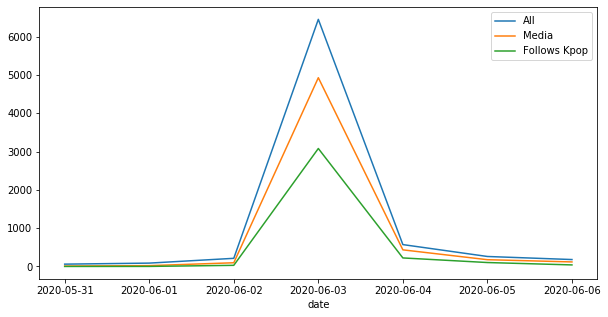

In [40]:
merged = subset[['user_id', 'date']].merge(kpop_df)
media = subset[subset.tweet.str.lower().str.contains('kpop|k-pop|bts|stan|https://t.co')]
ax = merged.groupby('date').size().plot(figsize=(10, 5))
media.groupby('date').size().plot();
fans = merged[merged.kpop == True]
fans.groupby('date').size().plot();
ax.legend(['All', 'Media', 'Follows Kpop'])

In [37]:
media = subset[subset.tweet.str.lower().str.contains('kpop|k-pop|bts|stan|https://t.co')]

5786

In [25]:
len(subset)

7485